In [1]:
import pandas as pd
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

https://networkx.org/documentation/stable/reference/algorithms/community.html <br>
http://networksciencebook.com/chapter/9#basics

In [2]:
G = nx.circulant_graph(8, [1])
edges = [
    (0, 9),
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (6, 7),
    (7, 8),
    (8, 9),
]

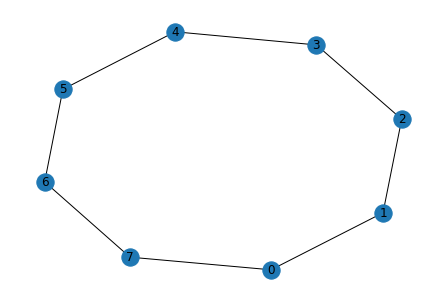

In [3]:
nx.draw(G, with_labels=True)

In [4]:
G.number_of_nodes()

8

In [5]:
G.number_of_edges()

8

In [6]:
from networkx.algorithms.community.quality import modularity

from networkx.utils.mapped_queue import MappedQueue

N = len(G.nodes())
m = sum([d.get("weight", 1) for u, v, d in G.edges(data=True)])
q0 = 1.0 / (2.0 * m)

# Map node labels to contiguous integers
label_for_node = {i: v for i, v in enumerate(G.nodes())}
node_for_label = {label_for_node[i]: i for i in range(N)}

# Calculate degrees
k_for_label = G.degree(G.nodes())
k = [k_for_label[label_for_node[i]] for i in range(N)]

# Initialize community and merge lists
communities = {i: frozenset([i]) for i in range(N)}
merges = []

In [7]:
# Initial modularity
partition = [[label_for_node[x] for x in c] for c in communities.values()]
q_cnm = modularity(G, partition)

In [8]:
import networkx.algorithms.community as nx_comm
partition

[[0], [1], [2], [3], [4], [5], [6], [7]]

In [9]:
nx_comm.modularity(G, partition)

-0.125

In [10]:
partition2 = [[0,1], [2,3], [4,5], [6,7]]
nx_comm.modularity(G, partition2)

0.25

In [11]:
partition3 = [[0,1,2] , [3], [4,5], [6,7]]
nx_comm.modularity(G, partition3)

0.21875

In [12]:
G.number_of_edges()

8

# Modularity networkx
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html

In [47]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(G))
sorted(c[0])

[0, 1]

In [48]:
c

[frozenset({0, 1}), frozenset({2, 3}), frozenset({4, 5}), frozenset({6, 7})]

### Modularity calculation

$M = \sum\limits_{c = 1}^{n_c } {\left[ {\frac{{L_c }}{L} - \left( {\frac{{k_c }}{{2L}}} \right)^2 } \right]}  \hspace{20 mm} (9 . 12)$

In [2]:
def get_modularity(N, community_size, avr_degree):
    
    #Number of links within the community
    L_c = community_size + 1
    #Total od links in the network
    L = N +1
    #Sum of degree of the nodes in the network
    K_c = community_size * avr_degree
    
    #Making the calculus of formula 9.12
    first_tem = L_c / L
    second_tem = (K_c / (2*L))**2
    
    #Return the value of modularity for cluster of size 
    return first_tem - second_tem

### (A) Modularity for each obtained partition

In [3]:
N = 100
avr_degree = 2

dict_modularitys = {}
for cluster_size in range(N):
    dict_modularitys[cluster_size] = get_modularity(N, cluster_size, avr_degree)

Text(0.5, 0, 'Cluster Size')

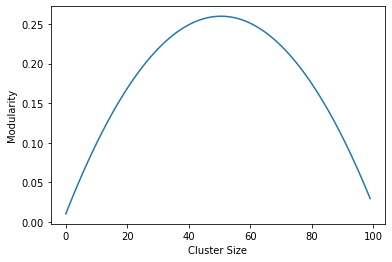

In [7]:
plt.plot(dict_modularitys.keys(),dict_modularitys.values())
plt.ylabel('Modularity')
plt.xlabel('Cluster Size')

### Maximum modularity

In [5]:
max_modularity = round(max(dict_modularitys.values()),2)
clusters = max(dict_modularitys, key=dict_modularitys.get)

print(f'Max modulatiry is: {max_modularity} for clusters with {clusters} nodes in a circle network with: {N} nodes and <k>: {avr_degree}.')


Max modulatiry is: 0.26 for clusters with 50 nodes in a circle network with: 100 nodes and <k>: 2.


Was tested some values of N and for a circle network (with <k> = 2) the max modularity was fond with only two cluster.